<a href="https://colab.research.google.com/github/karolinawegrzyn/projektPSI/blob/main/projekt_PSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przewidywanie czy uczeń pójdzie na studia
# dataset: https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset?select=data.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Przetwarzanie danych



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/karolinawegrzyn/projektPSI/main/data.csv')
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  in_college             1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB



Kolumny:
- type_school - typ szkoły do której uczęszcza uczeń
- school_accreditation - jakość szkoły (A lub B, A jest lepsze od B)
- gender - płeć
- interest - jak zainteresowany jest uczeń w pójście na studia
- residence - rodzaj zamieszkania
- parent_age - wiek rodziców
- parent_salary - zarobki rodziców
- house_area - wielkość domu rodzinnego w metrach kwadratowych
- average_grades - średnia ocen
- parent_was_in_college - czy rodzic był na studiach
- in_college - czy na studiach


Jak widzimy nie ma w naszym datasecie missing data, jednak musimy zmienić część danych na numeryczne

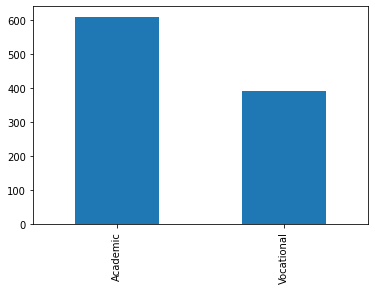

In [4]:
df['type_school'].value_counts().plot(kind='bar')
plt.show()

df['type_school'] = df['type_school'].replace({ 'Academic': 1, 'Vocational': 2})

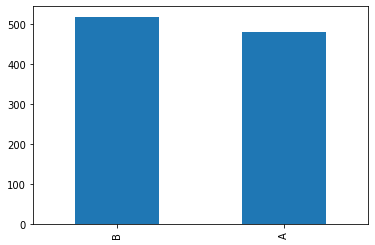

In [5]:
df['school_accreditation'].value_counts().plot(kind='bar')
plt.show()

df['school_accreditation'] = df['school_accreditation'].replace({'B' : 1, 'A': 2})

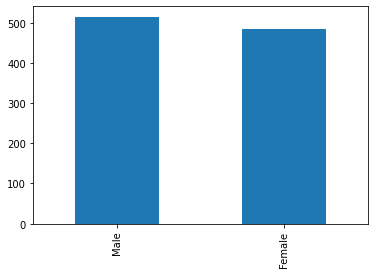

In [6]:
df['gender'].value_counts().plot(kind='bar')
plt.show()

df['gender'] = df['gender'].replace({'Male': 1, 'Female': 2})

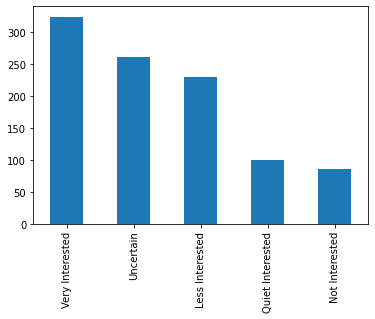

In [7]:
df['interest'].value_counts().plot(kind='bar')
plt.show()

df['interest'] = df['interest'].replace({'Not Interested': 1, 'Less Interested': 2, 'Uncertain' : 3, 'Quiet Interested': 4, 'Very Interested': 5})

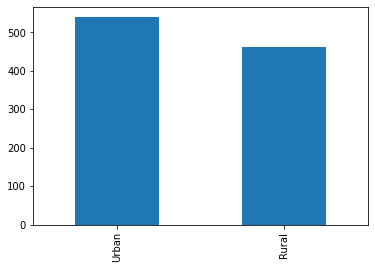

In [8]:
df['residence'].value_counts().plot(kind='bar')
plt.show()

df['residence'] = df['residence'].replace({'Urban': 1, 'Rural': 2})

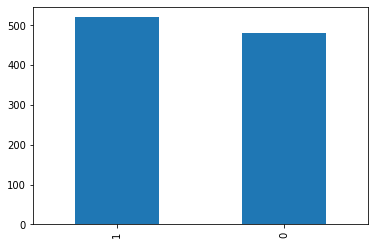

In [10]:
df['parent_was_in_college'].value_counts().plot(kind='bar')
plt.show()

df['parent_was_in_college'] = df['parent_was_in_college'].replace({True: 1, False: 0})

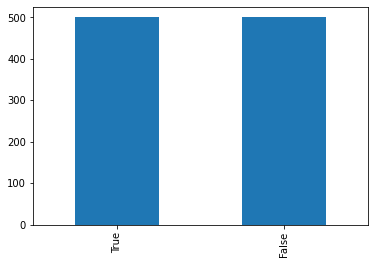

In [11]:
df['in_college'].value_counts().plot(kind='bar')
plt.show()

df['in_college'] = df['in_college'].replace({True: 1, False: 0})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   int64  
 1   school_accreditation   1000 non-null   int64  
 2   gender                 1000 non-null   int64  
 3   interest               1000 non-null   int64  
 4   residence              1000 non-null   int64  
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   int64  
 10  in_college             1000 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 86.1 KB


Jak widać wszędzie teraz mamy dane numeryczne

#Modelowanie


Dzielimy dane na treningowe i testowe

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop('in_college', axis=1)
Y = df.in_college

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

Logistic Regression

In [16]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression())])

param_grid = {
    'preprocessing': [StandardScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold)
grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 1, 'preprocessing': StandardScaler()}

Decision Tree Classifier

In [17]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [1, 5, 10, 15, 20, 40, 70],
            'classifier__max_leaf_nodes': [20, 30, 40, 50, 60, 70],
            'classifier__criterion': ['entropy', 'gini'],
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 70,
 'preprocessing': StandardScaler()}

Random Forest Classifier

In [18]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 5, 10, 50, 100, 200],
            'classifier__max_leaf_nodes': [20, 30, 40, 50, 60, 70],
}

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__max_leaf_nodes': 70,
 'classifier__n_estimators': 200,
 'preprocessing': None}

SVM z jądrem rbf

In [19]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='rbf'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [00.1, 0.1, 1, 10, 100],
            'classifier__gamma': [0.01, 0.1, 1, 10, 100],
}

grid_4 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__C': 100,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler()}

Ada Boost

In [20]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 150, 200],
            'classifier__learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.5],
}

grid_5 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__learning_rate': 0.5,
 'classifier__n_estimators': 200,
 'preprocessing': StandardScaler()}


K Neighbors Classifier


In [21]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_neighbors': [1, 2, 4, 6],
            'classifier__p': [1, 2, 4, 6],
}

grid_6 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__n_neighbors': 4,
 'classifier__p': 1,
 'preprocessing': StandardScaler()}

#Porównanie modeli

In [22]:
from sklearn import  metrics


models = []
models.append(('Logistic Regression', grid_1.best_estimator_))
models.append(('Decision Tree Classifier',grid_2.best_estimator_))
models.append(('Random Forest Classifier', grid_3.best_estimator_))
models.append(('SVM rbf', grid_4.best_estimator_))
models.append(('Ada Boost', grid_5.best_estimator_))
models.append(('K Neighbors Classifier', grid_6.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

In [23]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
dataframe = pd.DataFrame(data=d)
dataframe.insert(loc=0, column='Method', value=['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'SVM rbf', 'Ada Boost', 'K Neighbors Classifier'])
dataframe

,Method,precision_score,recall_score,f1_score,accuracy_score
0,Logistic Regression,0.826087,0.922330,0.871560,0.860
1,Decision Tree Classifier,0.854167,0.796117,0.824121,0.825
2,Random Forest Classifier,0.867925,0.893204,0.880383,0.875
3,SVM rbf,0.879630,0.922330,0.900474,0.895
4,Ada Boost,0.828829,0.893204,0.859813,0.850
5,K Neighbors Classifier,0.918605,0.766990,0.835979,0.845


#Sieć neuronowa

In [24]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.2
2.8.0


In [29]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History
from keras import backend

backend.clear_session()

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,671
Trainable params: 6,671
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 0.6875 - accuracy: 0.5038 - val_loss: 0.6649 - val_accuracy: 0.5550
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6319 - accuracy: 0.7825 - val_loss: 0.5610 - val_accuracy: 0.8300
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4992 - accuracy: 0.8400 - val_loss: 0.4112 - val_accuracy: 0.8700
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4063 - accuracy: 0.8450 - val_loss: 0.3634 - val_accuracy: 0.8650
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3807 - accuracy: 0.8375 - val_loss: 0.3582 - val_accuracy: 0.8600
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3639 - accuracy: 0.8562 - val_loss: 0.3581 - val_accuracy: 0.8550
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3583 - accuracy: 0.8525 - val_loss: 0.3558 - val_accuracy: 0.8550
Epoch 8/100


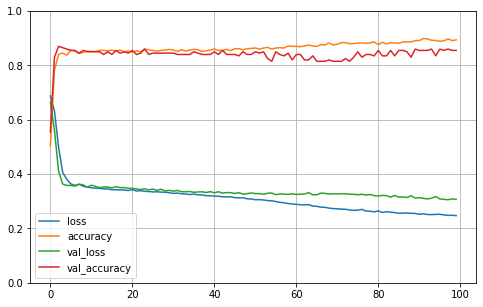

In [36]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()